<a href="https://colab.research.google.com/github/starceees/Unsupervised-Learning/blob/main/Time_series_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting for Water quality data of River Ganga
- The Uttarkhand Pollution board has collected water quality data of river ganga  at various places(**Lakshmanjhula Rishikesh** is our area of interest) *comprising* of **Temperature** , **PH**, **Disolved Oxygen(DO)** level, **Biological Oxygen Level Demand(BOD)** level, Total Coliform level and many others important for analysing the water quailty.<br>
- We intend to use **Time series Forecasting** methods Comprising of **Deep Learning Methods** to predict the water quality factors for the future and analyse the degradation of water in river ganga over the years.  

## Data Ingesion and visualization 
The data was organized to a sigle .csv file comprizing of 120 rows with 7 columns .

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = '/content/drive/MyDrive/Projects/river_data.csv'
data = pd.read_csv(url)
print(data)

        Month  temp    pH    DO  BOD tot_coli
0    Jan-2011  11.4  7.26  10.4  1.4      Nil
1    Feb-2011  14.2  7.20  11.0  2.4        5
2      Mar-11  18.8  7.49   9.0  1.3       22
3      Apr-11  18.8  7.49   9.0  1.3     22.0
4    May-2011  19.5  7.75   8.4  1.4    150.0
..        ...   ...   ...   ...  ...      ...
115    Aug-20  21.0  7.50  10.0    1       40
116   Sept-20  25.0  7.81  10.8    1       40
117    Oct-20  26.0  8.00  10.2    1       40
118    Nov-20  16.0  7.50  11.6    1       32
119    Dec-20  17.0  7.20  10.8    1       22

[120 rows x 6 columns]


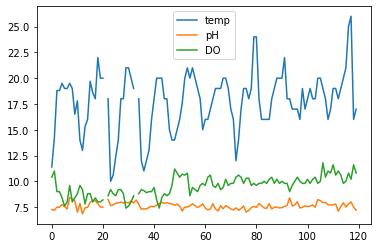

In [4]:
data.plot()
plt.show()

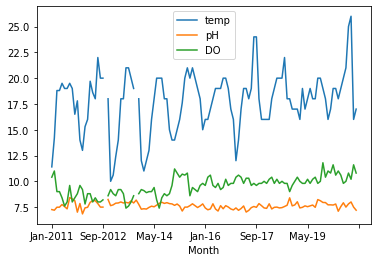

In [5]:
data.plot(x = "Month")
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
#random seed for reproducibility
np.random.seed(7)

In [8]:
data["temp"]

0      11.4
1      14.2
2      18.8
3      18.8
4      19.5
       ... 
115    21.0
116    25.0
117    26.0
118    16.0
119    17.0
Name: temp, Length: 120, dtype: float64

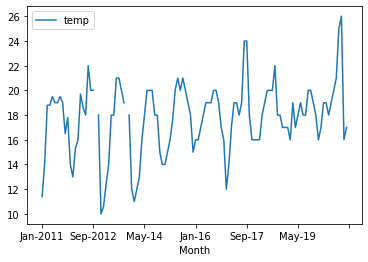

In [9]:
data.plot(x= "Month",y=  ["temp"])
dataset_temp = data[['temp']].dropna()

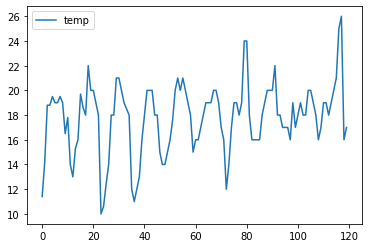

In [10]:
dataset_temp.plot()

In [11]:
dataset_temp.values
dataset_temp.astype('float32')

,temp
0,11.400000
1,14.200000
2,18.799999
3,18.799999
4,19.500000
...,...
115,21.000000
116,25.000000
117,26.000000
118,16.000000


In [12]:
#normalising and scaling the dataset
scaling = MinMaxScaler(feature_range=(0,1))
dataset = scaling.fit_transform(dataset_temp)

In [13]:
dataset

array([[0.0875 ],
       [0.2625 ],
       [0.55   ],
       [0.55   ],
       [0.59375],
       [0.5625 ],
       [0.5625 ],
       [0.59375],
       [0.5625 ],
       [0.40625],
       [0.4875 ],
       [0.25   ],
       [0.1875 ],
       [0.33125],
       [0.375  ],
       [0.60625],
       [0.5375 ],
       [0.5    ],
       [0.75   ],
       [0.625  ],
       [0.625  ],
       [0.5    ],
       [0.     ],
       [0.0375 ],
       [0.15   ],
       [0.25   ],
       [0.5    ],
       [0.5    ],
       [0.6875 ],
       [0.6875 ],
       [0.625  ],
       [0.5625 ],
       [0.5    ],
       [0.125  ],
       [0.0625 ],
       [0.125  ],
       [0.1875 ],
       [0.375  ],
       [0.5    ],
       [0.625  ],
       [0.625  ],
       [0.625  ],
       [0.5    ],
       [0.5    ],
       [0.3125 ],
       [0.25   ],
       [0.25   ],
       [0.3125 ],
       [0.375  ],
       [0.475  ],
       [0.625  ],
       [0.6875 ],
       [0.625  ],
       [0.6875 ],
       [0.625  ],
       [0.

In [14]:
#splitting dataset into training and testing 
train_size = int(len(dataset)*0.90)
test_size  = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :] 
print(len(train), len(test))

106 12


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
np.shape(trainX)

(104, 1, 1)

In [34]:
np.shape(trainY)

(1, 104)

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

ValueError: ignored

In [29]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [30]:
# invert predictions
trainPredict = scaling.inverse_transform(trainPredict)
trainY = scaling.inverse_transform([trainY])
testPredict = scaling.inverse_transform(testPredict)
testY = scaling.inverse_transform([testY])

ValueError: ignored

In [31]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.90 RMSE
Test Score: 19.66 RMSE


In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [26]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

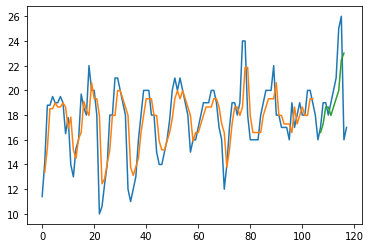

In [28]:
# plot baseline and predictions
plt.plot(scaling.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()